# Machine Learning Model Mockup

In [164]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Add Matplotlib inline magic command
%matplotlib inline

# Initial imports
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# Scikit-Learn Model Selection and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [156]:
# Scikit-Learn imports
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [159]:
# Sci-kit Learn Metrics imports
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [117]:
# Imbalanced Learn imports
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

In [132]:
# Load the data
file_path = 'Resources/fatal-police-shootings-data.csv' 
killings_df = pd.read_csv(file_path, low_memory = False)                         
killings_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6228,6791,Doward Sylleen Baker,4/19/2021,shot and Tasered,gun,39.0,M,B,Dothan,AL,False,attack,Car,False,-85.379,31.214,True
6229,6790,Ma’Khia Bryant,4/20/2021,shot,knife,16.0,F,B,Columbus,OH,False,other,Not fleeing,True,-82.839,39.917,True
6230,6793,NaN,4/21/2021,shot,metal pole,NaN,M,NaN,Escondido,CA,True,other,Not fleeing,True,-117.078,33.106,True
6231,6794,Andrew Brown,4/21/2021,shot,undetermined,42.0,M,B,Elizabeth City,NC,False,undetermined,Car,True,-76.226,36.290,True


## Preprocessing Data

In [133]:
# Inspect column data types
killings_df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

### The following column data types will need to be changed:
- Column Name --> New Datatype
    - date --> date
    - manner_of_death --> category
    - armed --> category
    - gender --> category
    - race --> category
    - city --> category
    - state --> category
    - threat_level --> category
    - flee --> category

In [134]:
killings_df['date'] = pd.to_datetime(killings_df['date'], format = '%m/%d/%Y')
killings_df.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
longitude                         float64
latitude                          float64
is_geocoding_exact                   bool
dtype: object

In [135]:
# Use for loop to convert object columns to category
for col in ['manner_of_death', 
            'armed', 
            'gender', 
            'race', 
            'city', 
            'state', 
            'threat_level', 
            'flee']:
    killings_df[col] = killings_df[col].astype('category')
    
killings_df.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                  category
armed                            category
age                               float64
gender                           category
race                             category
city                             category
state                            category
signs_of_mental_illness              bool
threat_level                     category
flee                             category
body_camera                          bool
longitude                         float64
latitude                          float64
is_geocoding_exact                   bool
dtype: object

In [136]:
# Find null values
for column in killings_df.columns:
    print(f'Column {column} has {killings_df[column].isnull().sum()} null values')

Column id has 0 null values
Column name has 232 null values
Column date has 0 null values
Column manner_of_death has 0 null values
Column armed has 208 null values
Column age has 278 null values
Column gender has 0 null values
Column race has 551 null values
Column city has 0 null values
Column state has 0 null values
Column signs_of_mental_illness has 0 null values
Column threat_level has 0 null values
Column flee has 377 null values
Column body_camera has 0 null values
Column longitude has 300 null values
Column latitude has 300 null values
Column is_geocoding_exact has 0 null values


In [137]:
# Replace empty/blank values
# Column: name
killings_df['name'].replace({None: 'Unavailable'}, inplace = True)

# Column: armed
killings_df['armed'].replace({None: 'undetermined'}, inplace = True)

# Column: age
killings_df['age'] = killings_df['age'].fillna(killings_df.groupby(['race', 'gender'])['age'].transform('mean'))

# Column: race
killings_df['race'].replace({None: 'U'}, inplace = True)

# Column: flee
killings_df['flee'].replace({None: 'U'}, inplace = True)

In [138]:
# Add day of week based on date?

In [139]:
# Drop id, name, age, date, latitude, longitude, and is_geo_coding_exact columns
# Columns not needed for ML model at this time
killings_df = killings_df.drop(killings_df.columns[[0, 1, 2, 5, 14, 15, 16]], axis = 1)

In [140]:
# Check column data types
killings_df.dtypes

manner_of_death            category
armed                        object
gender                     category
race                         object
city                       category
state                      category
signs_of_mental_illness        bool
threat_level               category
flee                         object
body_camera                    bool
dtype: object

In [141]:
# Re-inspect for null values
for column in killings_df.columns:
    print(f'Column {column} has {killings_df[column].isnull().sum()} null values')

Column manner_of_death has 0 null values
Column armed has 0 null values
Column gender has 0 null values
Column race has 0 null values
Column city has 0 null values
Column state has 0 null values
Column signs_of_mental_illness has 0 null values
Column threat_level has 0 null values
Column flee has 0 null values
Column body_camera has 0 null values


In [ ]:
# Get missing latitudes and longitudes?

In [142]:
# Use get_dummies() to transform text values into numerical values
killings_encoded = pd.get_dummies(killings_df, columns = ['manner_of_death', 'armed', 'gender', 'race', 'city',
                                                         'state', 'signs_of_mental_illness', 'threat_level',
                                                         'flee', 'body_camera'])
killings_encoded.head()

,manner_of_death_shot,manner_of_death_shot and Tasered,armed_Airsoft pistol,armed_BB gun,armed_BB gun and vehicle,armed_Taser,armed_air conditioner,armed_air pistol,armed_ax,armed_barstool,...,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other,flee_U,body_camera_False,body_camera_True
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


## Exploratory Data Analysis (EDA)

In [143]:
# Describe the data
killings_df.describe()

,manner_of_death,armed,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
count,6233,6233,6233,6233,6233,6233,6233,6233,6233,6233
unique,2,99,3,7,2721,51,2,3,5,2
top,shot,gun,M,W,Los Angeles,CA,False,attack,Not fleeing,False
freq,5915,3571,5955,2884,97,926,4794,4031,3803,5416


### Visually Inspect Data

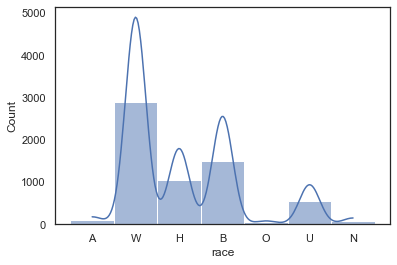

In [144]:
# Plot shootings by race 2015-2021
sns.histplot(killings_df.race, kde = True)
plt.show()

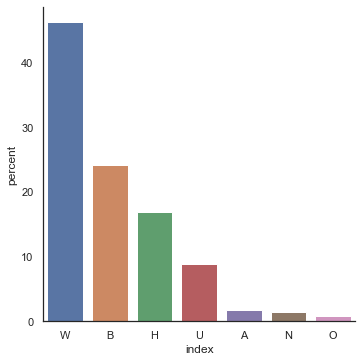

In [145]:
# Plot percentage of shootings by race 2015-2021
plot1 = killings_df.race.value_counts(normalize = True)

# Convert race counts to percents
plot1 = plot1 * 100
plot1 = plot1.rename('percent').reset_index()

sns.set_theme(style = 'white')
r = sns.catplot(x = 'index', y = 'percent', kind = 'bar', data = plot1)

plt.show()

In [107]:
# Maybe add some more graphs?

## Split Data into Training and Testing Sets

In [146]:
# Create features
X = pd.get_dummies(killings_df.drop(columns = ['signs_of_mental_illness']))

# Create target
y = pd.DataFrame(killings_df['signs_of_mental_illness'])

In [147]:
X.describe()

,manner_of_death_shot,manner_of_death_shot and Tasered,armed_Airsoft pistol,armed_BB gun,armed_BB gun and vehicle,armed_Taser,armed_air conditioner,armed_air pistol,armed_ax,armed_barstool,...,state_WV,state_WY,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other,flee_U
count,6233.000000,6233.000000,6233.000000,6233.000000,6233.000000,6233.000000,6233.000000,6233.000000,6233.000000,6233.000000,...,6233.000000,6233.000000,6233.000000,6233.000000,6233.000000,6233.000000,6233.000000,6233.000000,6233.000000,6233.000000
mean,0.948981,0.051019,0.000481,0.001765,0.000160,0.004653,0.000160,0.000160,0.003850,0.000160,...,0.009466,0.002407,0.646719,0.323921,0.029360,0.162522,0.131558,0.610140,0.035296,0.060485
std,0.220054,0.220054,0.021935,0.041976,0.012666,0.068057,0.012666,0.012666,0.061938,0.012666,...,0.096838,0.049001,0.478027,0.468008,0.168827,0.368959,0.338037,0.487758,0.184542,0.238401
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Prep Data for Supervised Machine Learning

In [148]:
# Check balance of target values
y['signs_of_mental_illness'].value_counts()

False    4794
True     1439
Name: signs_of_mental_illness, dtype: int64

In [149]:
# Train, test, and split model
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0,
                                                    stratify = y)

y_train.shape

(4674, 1)

In [150]:
# Creating a StandardScaler instance
scaler = StandardScaler()

# Fitting the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scaling the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Machine Learning Models

### Ensemble Learners

#### Compare two ensemble algorithms to determine which algorithm results in the best performance

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Print the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 78 for each algorithm to ensure consistency between tests

###  Balanced Random Forest Classifier

The BalancedRandomForestClassifier is an ensemble method in which each tree of the forest will be provided a balanced bootstrap sample. It randomly under-samples each boostrap sample to balance it. This class provides all functionality of the RandomForestClassifier.

In [151]:
# Create a random forest classifier
rf_model = BalancedRandomForestClassifier(n_estimators = 128, random_state = 78)
rf_model = rf_model.fit(X_train, y_train)

C:\Users\acfth\.conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [152]:
# Calculate balanced accuracy score
rf_y_pred = rf_model.predict(X_test)
balanced_accuracy_score(y_test, rf_y_pred)

0.6455286813084978

In [153]:
# Display confusion matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm

array([[722, 477],
       [112, 248]], dtype=int64)

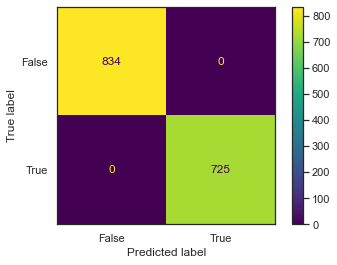

In [157]:
# Plot confusion matrix
fig = plot_confusion_matrix(rf_model, X_test, rf_y_pred)
plt.show()

In [160]:
# Print imbalanced classification report
print(classification_report_imbalanced(y_test, rf_y_pred))

                   pre       rec       spe        f1       geo       iba       sup

      False       0.87      0.60      0.69      0.71      0.64      0.41      1199
       True       0.34      0.69      0.60      0.46      0.64      0.42       360

avg / total       0.74      0.62      0.67      0.65      0.64      0.41      1559



In [161]:
# List feature sorted in descending order by feature importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse = True)

[(0.03641962028766956, 'flee_Not fleeing'),
 (0.02199744123824946, 'race_W'),
 (0.021338961081027598, 'flee_Car'),
 (0.017910643717604587, 'race_B'),
 (0.017706163579161636, 'armed_gun'),
 (0.016260178826455713, 'body_camera'),
 (0.014866145358361093, 'threat_level_other'),
 (0.014559403555275947, 'threat_level_attack'),
 (0.014480415510029114, 'armed_knife'),
 (0.012292356927932718, 'flee_Foot'),
 (0.011564898785705949, 'state_CA'),
 (0.011254567302820314, 'race_H'),
 (0.010096194091762049, 'armed_undetermined'),
 (0.008699705778698814, 'state_TX'),
 (0.008603200203009366, 'race_U'),
 (0.007917728665322987, 'armed_toy weapon'),
 (0.007866036144498193, 'state_FL'),
 (0.007358438791466501, 'armed_unarmed'),
 (0.006813472247708054, 'armed_vehicle'),
 (0.0066205917991148605, 'flee_U'),
 (0.0066148174537920944, 'flee_Other'),
 (0.006574585887303519, 'manner_of_death_shot'),
 (0.005719921714589581, 'state_AZ'),
 (0.005673549181277702, 'state_OH'),
 (0.005662133998266102, 'state_CO'),
 (0.00

### Easy Ensemble AdaBoost Classifer

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

This class implements the algorithm known as AdaBoost-SAMME

In [165]:
# Train EasyEnsembleClassifer
ee_model = EasyEnsembleClassifier(n_estimators = 128, random_state = 78)
ee_model = ee_model.fit(X_train, y_train)

In [166]:
# Calculate balanced accuracy score
ee_y_pred = ee_model.predict(X_test)
balanced_accuracy_score(y_test, ee_y_pred)

0.6185779816513761

In [167]:
ee_cm = confusion_matrix(y_test, ee_y_pred )
ee_cm

array([[704, 495],
       [126, 234]], dtype=int64)

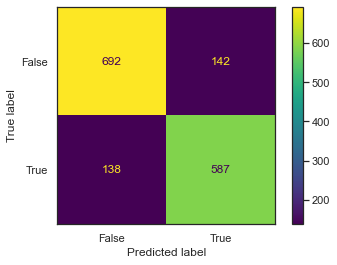

In [168]:
# Plot confusion matrix
fig = plot_confusion_matrix(ee_model, X_test, rf_y_pred)
plt.show()

In [169]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, ee_y_pred))

                   pre       rec       spe        f1       geo       iba       sup

      False       0.85      0.59      0.65      0.69      0.62      0.38      1199
       True       0.32      0.65      0.59      0.43      0.62      0.38       360

avg / total       0.73      0.60      0.64      0.63      0.62      0.38      1559

